<h1><center>CMPE 462 - Project 1<br>Binary Classification with Logistic Regression<br></center></h1>

# Overview

In this project, you are going to implement logistic regression from scratch. You are provided
a subset of the famous handwritten digit dataset called MNIST. In the subset, you will find images of digit 1 and 5. Therefore, you will be solving a binary classification problem. The project includes feature extraction, model training, and evaluation steps.

First, you will load and visualize the data portion we have provided to you and then extract two different set of features to build a classifier on. When you extracted the desired features, you will run your logistic regression implementation with gradient descent on the representations to classify digits into 1 and 5. You will experiment with different learning rates  and regularization parameter ($\lambda$) and find the optimal $\lambda$ with 5-fold cross validation. Finally, you will evaluate the implemented models, decide which is the best performing one and visualize a decision boundary.

Follow the steps on this notebook that would guide you through the solution step-by-step. Make sure that the notebook reports your work properly and add comments and opinions when necessary.

**IMPORTANT NOTE:** You are allowed to use third-party libraries such as `numpy` and `matplotlib` to help you implement necessary procedures. However, you should not import any function that accomplishes the task itself. For instance, you can use `numpy` arrays for matrix operations, but you cannot use `scikit-learn` to implement cross validation.

## Task 1: Feature Extraction (35 Pts)

Load the training/test data and labels as numpy arrays (Hint:`np.load`). Train and test data are 1561x256 and 424x256 dimensional matrices, respectively. Each row in the
aforementioned matrices corresponds to an image of a digit. The 256 pixels correspond to a 16x16 image. Label 1 is assigned to digit 1 and label -1 is assigned to digit 5.

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

test_labels = np.load('test_labels.npy')
test_data = np.load('test_data.npy')
train_labels = np.load('train_labels.npy')
train_data = np.load('train_data.npy')

**(5 points)** Display two of the digit images, one for digit 1 and one for digit 5. You can use `imshow` function of `matplotlib` library with a suitable colormap. You will first need to reshape 256 pixels to a 16x16 matrix. 

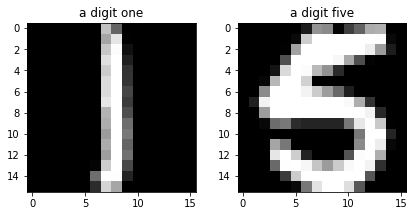

In [11]:
train_images = np.reshape(train_data,(1561,16,16))
test_images = np.reshape(test_data,(424,16,16))

digit_one = train_images[0]        #take the first digit
digit_five = train_images[1500]    #take the 1500th image
f,x = plt.subplots(1,2) 

x[0].set_title("a digit one")
x[1].set_title("a digit five")
x[0].imshow(digit_one,cmap='gray')
x[1].imshow(digit_five,cmap='gray')
f.tight_layout()
plt.show()

**(10 points) Implementing Representation 1:** Extract the **symmetry** and **average intensity** features discussed in the class (see logistic regression lecture notes). To compute the intensity features, compute the average pixel value of the image, and for the symmetry feature, compute the negative of the norm of the difference between the image and its y-axis symmetrical. Search numpy's documentation to find the suitable function at each step. You should extract these two features for each image in the training and test sets. As a result, you should obtain a training data matrix of size 1561x2 and test data matrix of size 424x2.

Throughout the notebook, we will refer the representation with these two features as **Representation 1** 

In [12]:
representation1_training = np.zeros([1561,2])
representation1_test = np.zeros([424,2])

for i in range(1561):
    representation1_training[i,0] = np.average(train_images[i,:]) #average intensity feature
    representation1_training[i,1] = -abs(np.linalg.norm(train_images[i,:] - np.flipud(train_images[i,:])))/20 #symmetry

for i in range(424):
    representation1_test[i,0] = np.average(test_images[i,:])
    representation1_test[i,1] = -abs(np.linalg.norm(test_images[i,:] - np.flipud(test_images[i,:])))/20

We have normalized the the features. This is the reason why we divide the symmetry value by 20.

**(5 points)** Provide two scatter plots, one for training and one for test data. The plots should contain the average intensity values in the x-axis and symmetry values in the
y-axis. Denote the data points of label 1 with blue marker shaped <font color='blue'>o</font> and the data points of label -1 with a red marker shaped <font color='red'>x</font>. (Hint: check out `plt.scatter` and its `marker` and `color` parameters). Explicitly state the axis labels and figure title for both plots (Hint: `plt.xlabel`, `plt.ylabel`, `plt.title`). 

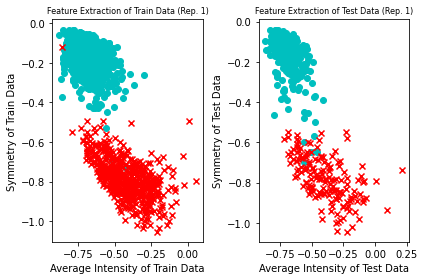

In [13]:
f,x = plt.subplots(1,2)

for i in range(1561):
    if train_labels[i] == 1:
        x[0].scatter(representation1_training[i,0],representation1_training[i,1],marker='o',color='c')
    else:
        x[0].scatter(representation1_training[i,0],representation1_training[i,1],marker='x',color='r')
        
for i in range(424):
    if test_labels[i] == 1:
        x[1].scatter(representation1_test[i,0],representation1_test[i,1],marker='o',color='c')
    else:
        x[1].scatter(representation1_test[i,0],representation1_test[i,1],marker='x',color='r')
        
x[0].set_title("Feature Extraction of Train Data (Rep. 1)",fontsize=8)
x[0].set_xlabel("Average Intensity of Train Data")
x[0].set_ylabel("Symmetry of Train Data")
x[1].set_title("Feature Extraction of Test Data (Rep. 1)",fontsize=8)
x[1].set_xlabel("Average Intensity of Test Data")
x[1].set_ylabel("Symmetry of Test Data")
f.tight_layout()
plt.show()

**(15 points) Implementing Representation 2:** Come up with an alternative feature extraction approach. The features can again be 2-D, or higher dimensional. If you use any external resource, please cite the references. Explain the feature extraction procedure clearly in your report; if it is an algorithm, provide the algorithm; if it is a function, provide the mathematical expressions. 

If your proposed features are 2-D or 3-D, provide the scatter plots similar to the previous step.

We will refer this representation proposed by you as **Representation 2**.

###  Representation 2:

The explanation of the representation 2 can be found in the report.

In [15]:
representation2_training = []
representation2_test = []

for img in train_data:
    representation2_arr = []
    imageMatrix = np.reshape(img, (16,16))
    
    count = 0
    totDiff = 0
    left = 15
    right = 0
    
    for i in range(16):
        for j in range(16):
            if imageMatrix[i][j] != -1 and j < left:
                left = j
                break
                
        for j in range(15,-1, -1):
            if imageMatrix[i][j] != -1 and j > right:
                right = j
                break
                
        if (i+1)%4 == 0:
            count += 1
            if right > left:
                totDiff += (right - left)
                
            left = 15
            right = 0
            
    representation2_arr.append(totDiff/(count*15))
    
    totDash = 0
    count = 0
    
    for j in range(16):
        contains0 = False
        maxPix = -1
        
        for i in range(16):
            if imageMatrix[i][j] > -0.0005:
                contains0 = True
            if imageMatrix[i][j] > maxPix:
                maxPix = imageMatrix[i][j]
                
        if contains0 == False or maxPix < -0.9995:
            continue
            
        for i in range(15):
            if (imageMatrix[i][j] == -1 and imageMatrix[i+1][j] != -1) or (imageMatrix[i][j] != -1 and imageMatrix[i+1][j] == -1):
                totDash += 1
        
        count += 1
        
    representation2_arr.append(totDash/(count*5))
    representation2_training.append(representation2_arr)
    
for img in test_data:
    representation2_arr = []
    imageMatrix = np.reshape(img, (16,16))
    
    count = 0
    totDiff = 0
    left = 15
    right = 0
    
    for i in range(16):
        for j in range(16):
            if imageMatrix[i][j] != -1 and j<left:
                left = j
                break
                
        for j in range(15,-1, -1):
            if imageMatrix[i][j] != -1 and j>right:
                right = j
                break
                
        if (i+1)%4 == 0:
            count += 1
            if right > left:
                totDiff += (right - left)
                
            left = 15
            right = 0
            
    representation2_arr.append(totDiff/(count*15))
    
    totDash = 0
    count = 0
    
    for j in range(16):
        contains0 = False
        maxPix = -1
        
        for i in range(16):
            if imageMatrix[i][j] > -0.05:
                contains0 = True
                
            if imageMatrix[i][j] > maxPix:
                maxPix = imageMatrix[i][j]
                
        if contains0 == False or maxPix < -0.1:
            continue
            
        for i in range(15):
            if (imageMatrix[i][j] == -1 and imageMatrix[i+1][j] != -1) or (imageMatrix[i][j] != -1 and imageMatrix[i+1][j] == -1):
                totDash += 1
                
        count += 1
        
    representation2_arr.append(totDash/(count*5))
    representation2_test.append(representation2_arr)


#### Illustration of images wrt. Representation 2:

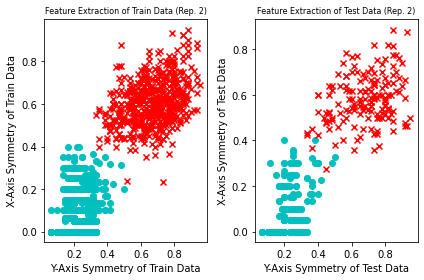

In [17]:
representation2_training = np.array(representation2_training)
representation2_test = np.array(representation2_test)

f,x20 = plt.subplots(1,2)

for i in range(1561):
    if train_labels[i] == 1:
        x20[0].scatter(representation2_training[i,0],representation2_training[i,1],marker='o',color='c')
    else:
        x20[0].scatter(representation2_training[i,0],representation2_training[i,1],marker='x',color='r')

for i in range(424):
    if test_labels[i] == 1:
        x20[1].scatter(representation2_test[i,0],representation2_test[i,1],marker='o',color='c')
    else:
        x20[1].scatter(representation2_test[i,0],representation2_test[i,1],marker='x',color='r')
        
x20[0].set_title("Feature Extraction of Train Data (Rep. 2)",fontsize=8)
x20[0].set_xlabel("Y-Axis Symmetry of Train Data")
x20[0].set_ylabel("X-Axis Symmetry of Train Data")
x20[1].set_title("Feature Extraction of Test Data (Rep. 2)",fontsize=8)
x20[1].set_xlabel("Y-Axis Symmetry of Test Data")
x20[1].set_ylabel("X-Axis Symmetry of Test Data")
f.tight_layout()
plt.show()

## Task 2: Logistic Regression (40 Pts)

**(20 points)** Implement the logistic regression classifier from scratch with gradient descent and train it using Representation 1 and Representation 2 as inputs. Concatenate
1 to your features for the intercept term, such that one data point will look like for 2-D features [1,$x_1$,$x_2$], and the model vector will be [$w_0, w_1, w_2$], where $w_0$ is the intercept parameter. 
You can refer to lecture notes (Logistic regression slides 29-30) to review the gradient descent learning algorithm and the logistic loss. To implement the gradient of the logistic loss with respect to $w$, first derive its expression by hand. Please include your derivation in your report.

To prove that your implementation is converging, keep the loss values at each gradient descent iteration in a numpy array. After the training is finalized, plot the loss values
with respect to iteration count (Hint: `plt.plot`). You should observe a decreasing loss as the number of iterations increases. Also, experiment with 5 different learning rates between 0 and 1, and plot the convergence curves for each learning rate in the same plot to observe the effect of the learning rate (step size) on the convergence. 

To decide when to terminate the gradient descent iterations, check the absolute difference between the current loss value and the loss value of the previous step. If the difference is less than a small number, such as $10^{-5}$, you can exit the loop.

In [18]:
def createW(w0):
    w = np.concatenate((w0*np.ones((1,1)),np.random.uniform(-1,1,(2,1))),axis=0)
    return w

def logistic_classifier_test(x,y,iters,nü,N,W0):
    X = np.concatenate((np.ones((N,1)),x),axis=1)
    Y = np.reshape(y,(N,1))
    W = createW(W0)
    gt = np.zeros(3)
    loss = np.zeros(iters)
    
    for i in range(iters):        
        W_t=np.transpose(W)
        
        for n in range(N):
            sgm = 1+np.exp(-Y[n]*W_t.dot(X[n]))
            loss[i] += np.log(sgm)
            gt = gt-Y[n]*X[n]*sgm
            
        gt = gt/N
        W = W-np.reshape(nü*gt,(3,1))
        loss[i] = loss[i]/N
    return loss

The derivation of gradient of logistic loss function can be found in the report. This is the the test function of logistic regression implemented with randomly created weight vector. We selected w0 as 1 for all parts in the assignment. The loss is plotted for 100 iterations.

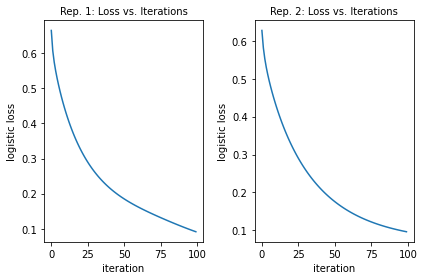

In [19]:
f,x3 = plt.subplots(1,2)

loss_representation1 = logistic_classifier_test(representation1_training,train_labels,100,0.25,1561,1)
loss_representation2 = logistic_classifier_test(representation2_training,train_labels,100,0.25,1561,1)

x3[0].plot(loss_representation1)
x3[1].plot(loss_representation2)
x3[0].set_title("Rep. 1: Loss vs. Iterations",fontsize=10)
x3[1].set_title("Rep. 2: Loss vs. Iterations",fontsize=10)
x3[0].set_xlabel('iteration',fontsize=10)
x3[0].set_ylabel('logistic loss',fontsize=10)
x3[1].set_ylabel('logistic loss',fontsize=10)
x3[1].set_xlabel('iteration',fontsize=10)
f.tight_layout()
plt.show()

#### Logistic classifier function:

In [20]:
def logistic_classifier(x,y,nü,N,delta,w0):
    X = np.concatenate((np.ones((N,1)),x),axis=1)
    Y = np.reshape(y,(N,1))
    W = createW(w0)
    gt = np.zeros(3)
    loss = []
    diff = []
    i = 0
    
    while(1):
        W_t = np.transpose(W)
        l = 0
        
        for n in range(N):
            sgm = 1+np.exp(-Y[n]*W_t.dot(X[n]))
            l = l+np.log(sgm)
            gt = gt-Y[n]*X[n]*sgm
        
        gt = gt/N
        W = W-np.reshape(nü*gt,(3,1))
        loss = np.append(loss,l/N)
        
        if(i > 0):
            diff=np.append(diff,loss[i-1]-loss[i])
            if(abs(loss[i]-loss[i-1])<delta):
                break
        
        i = i+1
        
    W_t = np.transpose(W)

    return loss,W,i

#### Experiment #1 with eta=0.25 and delta=0.00001:

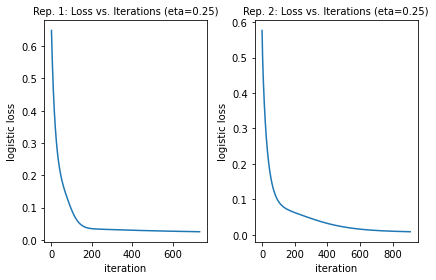

In [21]:
f,x4 = plt.subplots(1,2)

loss1_representation1,W1,i1 = logistic_classifier(representation1_training,train_labels,0.25,1561,0.00001,1)
loss1_representation2,W2,i2 = logistic_classifier(representation2_training,train_labels,0.25,1561,0.00001,1)

x4[0].plot(loss1_representation1)
x4[1].plot(loss1_representation2)
x4[0].set_title("Rep. 1: Loss vs. Iterations (eta=0.25)",fontsize=10)
x4[1].set_title("Rep. 2: Loss vs. Iterations (eta=0.25)",fontsize=10)
x4[0].set_xlabel('iteration',fontsize=10)
x4[0].set_ylabel('logistic loss',fontsize=10)
x4[1].set_ylabel('logistic loss',fontsize=10)
x4[1].set_xlabel('iteration',fontsize=10)
f.tight_layout()
plt.show()

#### Experiment #2 with eta=0.4 and delta=0.00001:

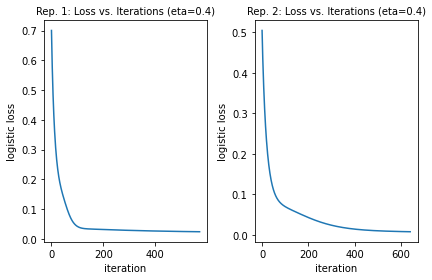

In [22]:
f,x5 = plt.subplots(1,2)

loss2_representation1,W1,i1 = logistic_classifier(representation1_training,train_labels,0.4,1561,0.00001,1)
loss2_representation2,W2,i2 = logistic_classifier(representation2_training,train_labels,0.4,1561,0.00001,1)

x5[0].plot(loss2_representation1)
x5[1].plot(loss2_representation2)
x5[0].set_title("Rep. 1: Loss vs. Iterations (eta=0.4)",fontsize=10)
x5[1].set_title("Rep. 2: Loss vs. Iterations (eta=0.4)",fontsize=10)
x5[0].set_xlabel('iteration',fontsize=10)
x5[0].set_ylabel('logistic loss',fontsize=10)
x5[1].set_ylabel('logistic loss',fontsize=10)
x5[1].set_xlabel('iteration',fontsize=10)
f.tight_layout()
plt.show()

#### Experiment #3 with eta=0,6 and delta=0.00001:

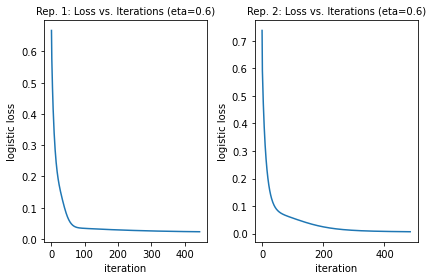

In [23]:
f,x6 = plt.subplots(1,2)

loss3_representation1,W1,i1 = logistic_classifier(representation1_training,train_labels,0.6,1561,0.00001,1)
loss3_representation2,W2,i2 = logistic_classifier(representation2_training,train_labels,0.6,1561,0.00001,1)

x6[0].plot(loss3_representation1)
x6[1].plot(loss3_representation2)
x6[0].set_title("Rep. 1: Loss vs. Iterations (eta=0.6)",fontsize=10)
x6[1].set_title("Rep. 2: Loss vs. Iterations (eta=0.6)",fontsize=10)
x6[0].set_xlabel('iteration',fontsize=10)
x6[0].set_ylabel('logistic loss',fontsize=10)
x6[1].set_ylabel('logistic loss',fontsize=10)
x6[1].set_xlabel('iteration',fontsize=10)
f.tight_layout()
plt.show()

#### Experiment #4 with eta=0,7 and delta=0.00001:

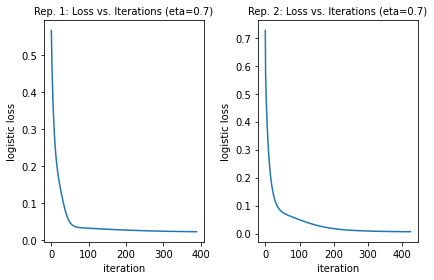

In [24]:
f,x7 = plt.subplots(1,2)

loss4_representation1,W1,i1 = logistic_classifier(representation1_training,train_labels,0.7,1561,0.00001,1)
loss4_representation2,W2,i2 = logistic_classifier(representation2_training,train_labels,0.7,1561,0.00001,1)

x7[0].plot(loss4_representation1)
x7[1].plot(loss4_representation2)
x7[0].set_title("Rep. 1: Loss vs. Iterations (eta=0.7)",fontsize=10)
x7[1].set_title("Rep. 2: Loss vs. Iterations (eta=0.7)",fontsize=10)
x7[0].set_xlabel('iteration',fontsize=10)
x7[0].set_ylabel('logistic loss',fontsize=10)
x7[1].set_ylabel('logistic loss',fontsize=10)
x7[1].set_xlabel('iteration',fontsize=10)
f.tight_layout()
plt.show() 

#### Experiment #5 with eta=0,99 and delta=0.00001:

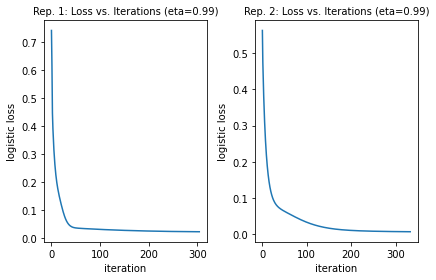

In [25]:
f,x8 = plt.subplots(1,2)

loss5_representation1,W1,i1 = logistic_classifier(representation1_training,train_labels,0.99,1561,0.00001,1)

loss5_representation2,W2,i2 = logistic_classifier(representation2_training,train_labels,0.99,1561,0.00001,1)

x8[0].plot(loss5_representation1)
x8[1].plot(loss5_representation2)
x8[0].set_title("Rep. 1: Loss vs. Iterations (eta=0.99)",fontsize=10)
x8[1].set_title("Rep. 2: Loss vs. Iterations (eta=0.99)",fontsize=10)
x8[0].set_xlabel('iteration',fontsize=10)
x8[0].set_ylabel('logistic loss',fontsize=10)
x8[1].set_ylabel('logistic loss',fontsize=10)
x8[1].set_xlabel('iteration',fontsize=10)
f.tight_layout()
plt.show()

**(10 points)** Implement logistic regression with $\ell_2$ norm regularization, $||\mathbf{w}||_{2}^{2}$ . Show that your implementation is working by visualizing the loss over the iterations again. Visualization for a single learning rate and $\lambda$ suffices. 

In [26]:
def classifier_with_regularization(x,y,nü,lmbda,N,delta,W):
    shuffle_ind = np.arange(N)
    np.random.shuffle(shuffle_ind)
    X = np.concatenate((np.ones((N,1)),x),axis=1)
    Y = np.reshape(y,(N,1))
    gt = np.zeros(3)
    loss = []
    diff = []
    i = 0
    
    while(1):
        W_t = np.transpose(W)
        l = 0
        n_W = np.linalg.norm(W)
        reg = lmbda*n_W**2
        
        for n in range(N):
            sgm = 1+np.exp(-Y[shuffle_ind[n]]*W_t.dot(X[shuffle_ind[n]]))
            l = l+np.log(sgm)
            gt = gt-Y[shuffle_ind[n]]*X[shuffle_ind[n]]*sgm
        
        gt = np.reshape(gt,(3,1))
        gt = gt/N+2*W*lmbda
        W = W-nü*gt
        gt = np.reshape(gt,(3,))
        loss = np.append(loss,l/N+reg)
        
        if(i > 0):
            diff = np.append(diff,loss[i-1]-loss[i])
            if(abs(loss[i]-loss[i-1]) < delta):
                break
                
        i = i+1
    
    W_t = np.transpose(W)
    return loss, W, i

The derivation of gradient of logistic regression with regularization is given in the report. We tested classifier with regularization with eta=0.25 and lambda=0.001.

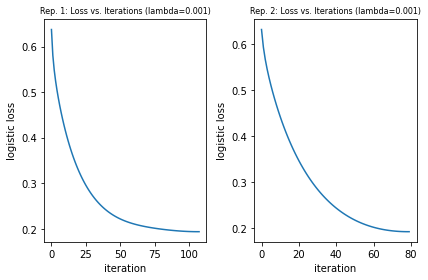

In [28]:
f,x9 = plt.subplots(1,2)
W = createW(1)

loss1_with_reg,w1,i = classifier_with_regularization(representation1_training,train_labels,0.25,0.001,1561,0.00001,W)
loss2_with_reg,w2,i = classifier_with_regularization(representation2_training,train_labels,0.25,0.001,1561,0.00001,W)

x9[0].plot(loss1_with_reg)
x9[1].plot(loss2_with_reg)
x9[0].set_title("Rep. 1: Loss vs. Iterations (lambda=0.001)",fontsize=8)
x9[1].set_title("Rep. 2: Loss vs. Iterations (lambda=0.001)",fontsize=8)
x9[0].set_xlabel('iteration',fontsize=10)
x9[0].set_ylabel('logistic loss',fontsize=10)
x9[1].set_ylabel('logistic loss',fontsize=10)
x9[1].set_xlabel('iteration',fontsize=10)
f.tight_layout()
plt.show()

**(10 points)** Implement a 5-fold cross validation procedure to find the optimal $\lambda$ value for both Representation 1 and 2. Experiment with at least three different $\lambda$ values between 0 and 1. Report the mean/std of cross validation accuracy of every representation/parameter combination as a table and clearly mark the best configuration in your report. 

In [29]:
def cross_validation(X,Y,nü,delta,lmbda):
    X_s = []
    Y_s = []
    size_tst = 313
    loss = []
    shuffle_ind = np.arange(1561)
    np.random.shuffle(shuffle_ind)
    
    for i in range(1561):
        X_s = np.append(X_s,X[shuffle_ind[i]])
        Y_s = np.append(Y_s,Y[shuffle_ind[i]])
    
    X_s = np.reshape(X_s,(1561,2))
    x = np.split(X_s[0:1560],5)
    y = np.split(Y_s[0:1560],5)
    accuracy = np.zeros(5)
    
    for k in range(5):
        x_tr = []
        y_tr = []
        x_tst = []
        y_tst = []
        W = createW(1)
        x_tst = np.append(x[k],np.reshape(X_s[1560],(1,2)),axis=0)
        x_tst = np.concatenate((np.ones((313,1)),x_tst),axis=1)
        y_tst = np.append(y[k],np.reshape(Y_s[1560],(1,)),axis=0)
        
        for i in range(5):
            if(i!=k):
                x_tr = np.append(x_tr,x[i])
                y_tr = np.append(y_tr,y[i])
        
        x_tr = np.reshape(x_tr,(1248,2))
        loss,W,itr = classifier_with_regularization(x_tr,y_tr,nü,lmbda,1248,delta,W)
        W_t = np.transpose(W)
        
        for i in range(size_tst):
            if (W_t.dot(np.reshape(x_tst[i],(3,1)))*y_tst[i] > 0):
                accuracy[k] = accuracy[k]+1
        
        accuracy[k] = accuracy[k]/size_tst*100
    return accuracy


Cross Validation on Representation 1 with eta=0.25 and lambda=0.05 :

In [30]:
accuracies_r1_lm1 = cross_validation(representation1_training,train_labels,0.25,0.00001,0.05)
print("accuracies (lambda=0.05):",accuracies_r1_lm1)

accuracies (lambda=0.05): [93.29073482 94.88817891 89.77635783 91.69329073 97.76357827]


Cross Validation on Representation 1 with eta=0.25 and lambda=0.1 :

In [31]:
accuracies_r1_lm2 = cross_validation(representation1_training,train_labels,0.25,0.00001,0.1)
print("accuracies (lambda=0.1):",accuracies_r1_lm2)

accuracies (lambda=0.1): [92.01277955 88.81789137 88.49840256 91.0543131  87.85942492]


Cross Validation on Representation 1 with eta=0.25 and lambda=0.5 :

In [32]:
accuracies_r1_lm3 = cross_validation(representation1_training,train_labels,0.25,0.00001,0.5)
print("accuracies (lambda=0.5):",accuracies_r1_lm3)

accuracies (lambda=0.5): [63.57827476 64.85623003 71.88498403 66.1341853  68.05111821]


Cross Validation on Representation 1 with eta=0.25 and lambda=0 :

In [33]:
accuracies_r1_lm4 = cross_validation(representation1_training,train_labels,0.25,0.00001,0)
print("accuracies (lambda=0):",accuracies_r1_lm4)

accuracies (lambda=0): [99.68051118 99.68051118 97.44408946 99.68051118 99.68051118]


In [34]:
print("mean (lambda=0.05):",np.mean(accuracies_r1_lm1))
print("std (lambda=0.05):",np.std(accuracies_r1_lm1))
print("mean (lambda=0.1):",np.mean(accuracies_r1_lm2))
print("std (lambda=0.1):",np.std(accuracies_r1_lm2))
print("mean (lambda=0.5):",np.mean(accuracies_r1_lm3))
print("std (lambda=0.5):",np.std(accuracies_r1_lm3))
print("mean (lambda=0):",np.mean(accuracies_r1_lm4))
print("std (lambda=0):",np.std(accuracies_r1_lm4))

mean (lambda=0.05): 93.48242811501598
std (lambda=0.05): 2.7304614209867752
mean (lambda=0.1): 89.64856230031948
std (lambda=0.1): 1.5987215339548622
mean (lambda=0.5): 66.90095846645369
std (lambda=0.5): 2.8973249964868044
mean (lambda=0): 99.2332268370607
std (lambda=0): 0.8945686900958436


Cross Validation on Representation 2 with eta = 0.25 and lambda = 0.05

In [38]:
accuracies_r2_lm1 = cross_validation(representation2_training,train_labels,0.25,0.00001,0.05)
print("accuracies (lambda=0.05):",accuracies_r2_lm1)

accuracies (lambda=0.05): [98.72204473 97.76357827 97.44408946 96.485623   98.40255591]


Cross Validation on Representation 2 with eta = 0.25 and lambda = 0.1

In [35]:
accuracies_r2_lm2 = cross_validation(representation2_training,train_labels,0.25,0.00001,0.1)
print("accuracies (lambda=0.1):",accuracies_r2_lm2)

accuracies (lambda=0.1): [95.52715655 96.16613419 97.76357827 94.5686901  98.40255591]


Cross Validation on Representation 2 with eta = 0.25 and lambda = 0.5

In [36]:
accuracies_r2_lm3 = cross_validation(representation2_training,train_labels,0.25,0.00001,0.5)
print("accuracies (lambda=0.5):",accuracies_r2_lm3)

accuracies (lambda=0.5): [69.00958466 84.66453674 78.5942492  76.03833866 79.23322684]


In [39]:
print("mean (lambda=0.05):",np.mean(accuracies_r2_lm1))
print("std (lambda=0.05):",np.std(accuracies_r2_lm1))
print("mean (lambda=0.1):",np.mean(accuracies_r2_lm2))
print("std (lambda=0.1):",np.std(accuracies_r2_lm2))
print("mean (lambda=0.5):",np.mean(accuracies_r2_lm3))
print("std (lambda=0.5):",np.std(accuracies_r2_lm3))

mean (lambda=0.05): 97.76357827476038
std (lambda=0.05): 0.7825845823588407
mean (lambda=0.1): 96.48562300319489
std (lambda=0.1): 1.4144372920880932
mean (lambda=0.5): 77.50798722044729
std (lambda=0.5): 5.094218895334126



|      rep/lambda | 0.05 |0.1  | 0.5  | 
|----------------:|-------|---|---|
| rep.1 mean | 93.54  | 89.39  | 67.34  |   
| rep.2 mean | 97.69    |96.54   |78.21   |  
| rep.1 std  |    1.83   |  2.66 | 3.54  |   
| rep.2 std  |    1.37   |  0.86 |7.54 |   


## Task 3: Evaluation (25 Pts)

**(5 points)** Train the logistic regression classifier on Representation 1 and 2 with the best learning rate you decide. Similarly, train the regularized logistic regression classifier with the best $\lambda$ you obtained by 5-fold cross validation. Report the training and test classification accuracy as 
\begin{align*}
\frac{\text{number of correctly classified samples}}{\text{total number of samples}}x100
\end{align*}

In [40]:
def test(x,y,model,size_tst):
    x = np.concatenate((np.ones((size_tst,1)),x),axis=1)
    y = np.reshape(y,(size_tst,1))
    W_t = np.transpose(model)
    accuracy = 0
    
    for i in range(size_tst):
        if (W_t.dot(np.reshape(x[i],(3,1)))*y[i] > 0):
            accuracy = accuracy+1 
    
    return accuracy/size_tst*100

W = createW(1)

loss,model,i=classifier_with_regularization(representation1_training,train_labels,0.99,0.05,1561,0.00001,W)
print("-----Representation 1 ------")
print("final model=",np.transpose(model))
print("accuracy on train set:",test(representation1_training,train_labels,model,1561))
print("accuracy on test set:",test(representation1_test,test_labels,model,424))

loss,model,i=classifier_with_regularization(representation2_training,train_labels,0.99,0.05,1561,0.00001,W)
print("-----Representation 2 ------")
print("final model=",np.transpose(model))
print("accuracy on train set:",test(representation2_training,train_labels,model,1561))
print("accuracy on test set:",test(representation2_test,test_labels,model,424))

-----Representation 1 ------
final model= [[ 1.1350182  -2.25797238  3.36415882]]
accuracy on train set: 93.52978859705317
accuracy on test set: 91.50943396226415
-----Representation 2 ------
final model= [[ 2.24087294 -1.95178701 -2.687235  ]]
accuracy on train set: 97.82190903267136
accuracy on test set: 96.4622641509434


We choosed eta as 0.99 and lambda as 0.05.

#### Experimentation with lambda = 0

In [41]:
W = createW(1)
loss,model,i = classifier_with_regularization(representation1_training,train_labels,0.99,0,1561,0.00001,W)

print("-----Representation 1 ------")
print("final model=",np.transpose(model))
print("accuracy on train set:",test(representation1_training,train_labels,model,1561))
print("accuracy on test set:",test(representation1_test,test_labels,model,424))

-----Representation 1 ------
final model= [[11.55619451  2.39858583 22.2423998 ]]
accuracy on train set: 99.67969250480462
accuracy on test set: 97.87735849056604


In [42]:
loss,model,i = classifier_with_regularization(representation2_training,train_labels,0.99,0,1561,0.00001,W)

print("-----Representation 2 ------")
print("final model=",np.transpose(model))
print("accuracy on train set:",test(representation2_training,train_labels,model,1561))
print("accuracy on test set:",test(representation2_test,test_labels,model,424))

-----Representation 2 ------
final model= [[ 52.06703883 -57.10783906 -72.5685555 ]]
accuracy on train set: 99.80781550288278
accuracy on test set: 98.82075471698113


**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

In [60]:
l_r1,W,i = logistic_classifier(representation1_training,train_labels,0.99,1561,0.00001,1)
print("final model of rep. 1:",np.transpose(W))

final model of rep. 1: [[11.56761931  2.41061067 22.25078399]]


In [43]:
loss_r2,W2,i = logistic_classifier(representation2_training,train_labels,0.99,1561,0.00001,1)
print("final model of rep. 2:",np.transpose(W2))

final model of rep. 2: [[ 52.46400893 -57.72762919 -72.91170828]]


The representations are trained with eta=0.99. We used a solver to solve $\mathbf{w}^{T}x=0$

In [45]:
from sympy.solvers import solve
from sympy import Symbol

x1 = Symbol('x1')
x2 = Symbol('x2')
y = solve(x1*W[1]+x2*W[2]+W[0], x1,x2)

print(y)

{x1: 6.22390723598927 - 2.79179577954551*x2}


In [47]:
from sympy.solvers import solve
from sympy import Symbol

x1 = Symbol('x1')
x2 = Symbol('x2')
y = solve(x1*W2[1]+x2*W2[2]+W2[0], x1,x2)

print(y)

{x1: 0.908819739560078 - 1.26302966697838*x2}


The decision boundaries ,which are blue lines, are also plotted with the distribution of the features:

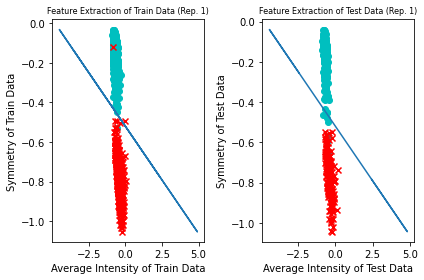

In [48]:
f,x = plt.subplots(1,2)

for i in range(1561):
    if train_labels[i] == 1:
        x[0].scatter(representation1_training[i,0],representation1_training[i,1],marker='o',color='c')
    else:
        x[0].scatter(representation1_training[i,0],representation1_training[i,1],marker='x',color='r')

for i in range(424):
    if test_labels[i] == 1:
        x[1].scatter(representation1_test[i,0],representation1_test[i,1],marker='o',color='c')
    else:
        x[1].scatter(representation1_test[i,0],representation1_test[i,1],marker='x',color='r')

x[0].set_title("Feature Extraction of Train Data (Rep. 1)",fontsize=8)
x[0].set_xlabel("Average Intensity of Train Data")
x[0].set_ylabel("Symmetry of Train Data")
x[1].set_title("Feature Extraction of Test Data (Rep. 1)",fontsize=8)
x[1].set_xlabel("Average Intensity of Test Data")
x[1].set_ylabel("Symmetry of Test Data")
x[0].plot(representation1_training[:,1]*-9.23035155924125- 4.79862610569552,representation1_training[:,1])
x[1].plot(representation1_test[:,1]*-9.23035155924125- 4.79862610569552,representation1_test[:,1])
f.tight_layout()
plt.show()

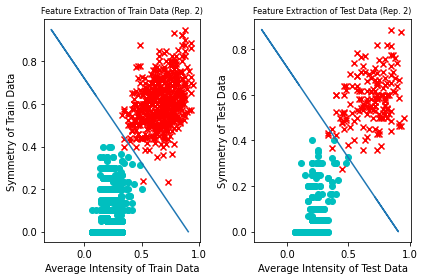

In [50]:
f,x = plt.subplots(1,2)

for i in range(1561):
    if train_labels[i] == 1:
        x[0].scatter(representation2_training[i,0],representation2_training[i,1],marker='o',color='c')
    else:
        x[0].scatter(representation2_training[i,0],representation2_training[i,1],marker='x',color='r')
for i in range(424):
    if test_labels[i] == 1:
        x[1].scatter(representation2_test[i,0],representation2_test[i,1],marker='o',color='c')
    else:
        x[1].scatter(representation2_test[i,0],representation2_test[i,1],marker='x',color='r')

x[0].set_title("Feature Extraction of Train Data (Rep. 2)",fontsize=8)
x[0].set_xlabel("Average Intensity of Train Data")
x[0].set_ylabel("Symmetry of Train Data")
x[1].set_title("Feature Extraction of Test Data (Rep. 2)",fontsize=8)
x[1].set_xlabel("Average Intensity of Test Data")
x[1].set_ylabel("Symmetry of Test Data")
x[0].plot(representation2_training[:,1]*-1.25993852150745+0.907762201703971,representation2_training[:,1])
x[1].plot(representation2_test[:,1]*-1.25993852150745+0.907762201703971,representation2_test[:,1])
f.tight_layout()
plt.show()

**(5 points)** Comment on your work in your report. Include the answers for the following questions in your discussion. 

* Did regularization improve the generalization performance (did it help reducing the gap between training and test accuracies/errors)? Did you observe any difference between using Representation 1 and 2?
* Which feature set did give the best results? Which one is more discriminative?
* What would be your next step to improve test accuracy? 

The answers can be found in the report.